In [1]:
import requests
import json
import pandas as pd
import csv
import datetime
import dateutil.parser
import unicodedata

#This module provides regular expressions
import re

In [2]:
# Reads dataset file
df = pd.read_csv('D:/Users/krishpot/4th year 1st SEM/CSE 15 Data Mining/Data Set_Student Reviews.csv', header = None, encoding='utf-8')

# Changes header title
df.columns=['Text']

df

Text
0                                              Reviews
1    1.                 Before uploading the video ...
2    2.                Before, she is kind to her s...
3    3.                Can be improved. Hope she co...
4    4.                For this subject, some topic...
..                                                 ...
849  846.       The professor was active in google ...
850   847.        Very nice and accommodating teacher!
851  848.       Words  can''t express how i am grat...
852  849.       in my opinion, the instructor''s wa...
853  850.        please speak tagalog when teaching...

[854 rows x 1 columns]

In [3]:
# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = text.lower()
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = re.sub('httpS+s*', ' ',text)  # remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#S+', '', text)  # remove hashtags
    text = re.sub('@S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7F]+',r' ', text) # replace non-ASCII characters
    text = re.sub('\s\s+', ' ', text)  # remove extra whitespace
    return text

# Cleaning the text in the Text column
df['Cleaned_Text'] = df['Text'].apply(clean)
df

Text  \
0                                              Reviews   
1    1.                 Before uploading the video ...   
2    2.                Before, she is kind to her s...   
3    3.                Can be improved. Hope she co...   
4    4.                For this subject, some topic...   
..                                                 ...   
849  846.       The professor was active in google ...   
850   847.        Very nice and accommodating teacher!   
851  848.       Words  can''t express how i am grat...   
852  849.       in my opinion, the instructor''s wa...   
853  850.        please speak tagalog when teaching...   

                                          Cleaned_Text  
0                                              reviews  
1     before uploading the video discussion i sugge...  
2     before she is kind to her students my classma...  
3     can be improved hope she considers personal n...  
4     for this subject some topics are not easy but...  
..                                                 ...  
849   the professor was active in google meets spec...  
850                very nice and a ommodating teacher   
851   words can t express how i am grateful with ou...  
852   in my opinion the instructor s way of encoura...  
853          please speak tagalog when teaching please  

[854 rows x 2 columns]

In [4]:
df.loc[0, 'Text']

'Reviews'

In [5]:
df.loc[0, 'Cleaned_Text']

'reviews'

In [6]:
# Sorts Text column
df.sort_values('Text', inplace = True)

# Counts numbers of duplicates
duplicates = df.pivot_table(columns=['Text'], aggfunc='size')
duplicates

Text
-                   She didn''t release our grades from prelims to midterms."                                                                                                                                                                                                                                                                                                                                                                                                             1
-                   Titus 2:7-8"                                                                                                                                                                                                                                                                                                                                                                                                                                                          1
-                   she only reads the modu

In [7]:
# Drops all duplicate values 
df.drop_duplicates(subset ="Text",keep = False, inplace = True)
df

Text  \
171  -                   She didn''t release our gr...   
50                    -                   Titus 2:7-8"   
312  -                   she only reads the module ...   
1    1.                 Before uploading the video ...   
10   10.             I appreciate the faculty conce...   
..                                                 ...   
97   96.           At first, I liked my professor b...   
98   97.            Doesn''t conduct classes, but p...   
99                        98.           Excellent prof   
100  99.           For the duration of this semeste...   
0                                              Reviews   

                                          Cleaned_Text  
171   she didn t release our grades from prelims to...  
50                                              titus   
312   she only reads the module when she is having ...  
1     before uploading the video discussion i sugge...  
10    i appreciate the faculty concerned in this su...  
..                                                 ...  
97    at first i liked my professor because she is ...  
98         doesn t conduct classes but post activities  
99                                      excellent prof  
100   for the duration of this semester she never d...  
0                                              reviews  

[854 rows x 2 columns]

In [8]:
#check for null values in dataset
df.isnull().values.any()

False

In [10]:
#set english stopwords
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
stop_words_en=set(stopwords)
print(stop_words_en)

{'she', 'over', "you're", "it's", "don't", 'this', 'itself', 'than', 'wasn', 's', 'will', 'was', "isn't", "couldn't", 'hasn', 'we', 'no', 'ours', 'does', 'are', 'there', 'down', 'for', 'most', 'ma', 'their', "weren't", 'until', 'and', 'couldn', 'him', "haven't", 'am', 'her', 'but', 'doesn', 'then', 'not', 'under', "you've", 'theirs', 'to', 'just', 'having', 'while', 'these', 'each', 'our', 'yourselves', 'herself', "you'd", 'before', 'himself', 'hers', 'doing', 'he', 'yours', 'from', 'again', 'when', 'd', "wasn't", 'weren', 'it', 'more', 't', "mustn't", "hadn't", "should've", 'here', 'off', 'how', 'myself', 'wouldn', 'i', 'o', 'yourself', 'if', 'y', 'do', 'at', 'needn', 'being', 'which', 'is', "hasn't", 'very', 'have', 'now', 'as', "shouldn't", 'that', 'into', 'should', 'a', 'same', 'll', 'because', 'too', 'won', 'with', 'all', 'few', 'hadn', 'your', 'below', 'haven', 'why', 'can', "aren't", 'mightn', 'what', 'during', 'were', 'shan', 'nor', 'such', 're', 'had', 'only', 'didn', 'aren', 

In [14]:
#removing english and tagalog stopwords
from nltk.tokenize import word_tokenize
def removing_en_stopwords(text):
    tokens = word_tokenize(text)
    text = [word for word in tokens if not word
in stop_words_en]
    return text
df['removed_stopwords'] = df.Cleaned_Text.apply(lambda x: removing_en_stopwords(x))
df

Text  \
171  -                   She didn''t release our gr...   
50                    -                   Titus 2:7-8"   
312  -                   she only reads the module ...   
1    1.                 Before uploading the video ...   
10   10.             I appreciate the faculty conce...   
..                                                 ...   
97   96.           At first, I liked my professor b...   
98   97.            Doesn''t conduct classes, but p...   
99                        98.           Excellent prof   
100  99.           For the duration of this semeste...   
0                                              Reviews   

                                          Cleaned_Text  \
171   she didn t release our grades from prelims to...   
50                                              titus    
312   she only reads the module when she is having ...   
1     before uploading the video discussion i sugge...   
10    i appreciate the faculty concerned in this su...   
..                                                 ...   
97    at first i liked my professor because she is ...   
98         doesn t conduct classes but post activities   
99                                      excellent prof   
100   for the duration of this semester she never d...   
0                                              reviews   

                                     removed_stopwords  
171               [release, grades, prelims, midterms]  
50                                             [titus]  
312  [reads, module, class, explanations, students,...  
1    [uploading, video, discussion, suggest, discus...  
10   [appreciate, faculty, concerned, subject, effo...  
..                                                 ...  
97   [first, liked, professor, strict, learned, muc...  
98                [conduct, classes, post, activities]  
99                                   [excellent, prof]  
100  [duration, semester, never, discussed, lessons...  
0                                            [reviews]  

[854 rows x 3 columns]

Data Exploration

In [21]:
#Convert list to String
df2 = pd.DataFrame(columns=['removed_stopwords'])
def listToString(s): 
    str1 = ""
    for ele in s:
        str1 = str1 + " " + ele
    return str1
df2['cleaned_texts'] = df.removed_stopwords.apply(lambda x:listToString(x))


In [24]:
#Export dataframe for manual clssification and rule based classification
df2.to_csv('sentimentAnalysis_en.csv')
del df2['removed_stopwords']
df2


cleaned_texts
171                    release grades prelims midterms
50                                               titus
312   reads module class explanations students gift...
1     uploading video discussion suggest discuss cl...
10    appreciate faculty concerned subject efforts ...
..                                                 ...
97    first liked professor strict learned much dis...
98                     conduct classes post activities
99                                      excellent prof
100   duration semester never discussed lessons eve...
0                                              reviews

[854 rows x 1 columns]

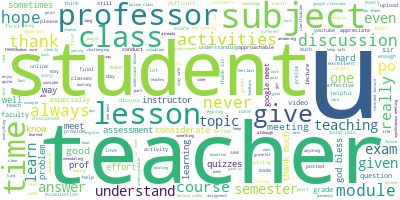

In [26]:
#word cloud
from wordcloud import WordCloud
long_string = ','.join(list(df2['cleaned_texts'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()